In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
price_df = pd.read_csv('train_set_nostandardBBB.csv')
price_t_df = pd.read_csv('test_set_nostandardBBB.csv')

In [3]:
price_df.rename(columns={'date':'ds','predict':'y'},inplace=True)
price_df['ds'] = pd.to_datetime(price_df['ds'])
price_t_df.rename(columns = {'date':'ds','predict':'y'},inplace=True)
price_t_df['ds'] = pd.to_datetime(price_t_df['ds'])
#modify y in training set
price_df['y_orig'] = price_df['y']#将y_orig加入为最后一列
price_t_df['y_orig'] = price_t_df['y']
for i in range(len(price_df)):
    price_df.iloc[i,-2] += 1    #统一y+=1
for i in range(len(price_t_df)):
    price_t_df.iloc[i,-2] += 1
price_df['y'] = np.log(price_df['y'])  #对y取log
price_t_df['y'] = np.log(price_t_df['y'])
y_true = price_t_df['y_orig']  #保存测试集上真值

In [4]:
yhat = []
yhat_lower = []
yhat_upper = []

In [5]:
while len(price_t_df)>0:
    print(len(price_t_df))
    #训练模型
    model = Prophet(daily_seasonality=True) 
    model.fit(price_df)
    future_data = model.make_future_dataframe(periods=5, freq = 'd') #每次预测之后五天
    forecast_data = model.predict(future_data)
    #保存预测值
    yhat.append(np.exp(forecast_data.loc[len(forecast_data)-5:len(forecast_data)-1,'yhat'])-1)
    yhat_lower.append(np.exp(forecast_data.loc[len(forecast_data)-5:len(forecast_data)-1,'yhat_lower'])-1)
    yhat_upper.append(np.exp(forecast_data.loc[len(forecast_data)-5:len(forecast_data)-1,'yhat_upper'])-1)
    #更新数据
    for i in range(5):
        price_df.loc[len(price_df)] = price_t_df.loc[0]  #将testset的第一行加入trainset的末尾
        price_t_df = price_t_df.drop([0]).reset_index(drop = True) #删除testset第一行，并且更新index

575


D:\Anaconda\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


570
565
560
555
550
545
540
535
530
525
520
515
510
505
500
495
490
485
480
475
470
465
460
455
450
445
440
435
430
425
420
415
410
405
400
395
390
385
380
375
370
365
360
355
350
345
340
335
330
325
320
315
310
305
300
295
290
285
280
275
270
265
260
255
250
245
240
235
230
225
220
215
210
205
200
195
190
185
180
175
170
165
160
155
150
145
140
135
130
125
120
115
110
105
100
95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5


In [6]:
#将结果转化成list
yhat_list = []
yhat_lower_list = []
yhat_upper_list = []
for i in yhat:
    yhat_list+=i.tolist()
for i in yhat_lower:
    yhat_lower_list+=i.tolist()
for i in yhat_upper:
    yhat_upper_list+=i.tolist()

In [7]:
result = pd.DataFrame({'yhat':yhat_list,'yhat_lower':yhat_lower_list,'yhat_upper':yhat_upper_list,'y':y_true})

In [8]:
result.to_csv('resultBBB.csv')

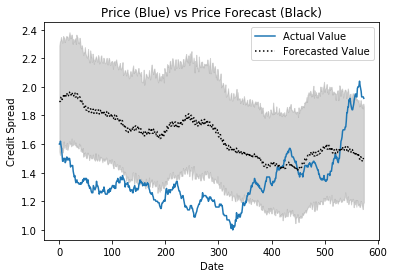

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(y_true.index,np.array(y_true),label = 'Actual Value')
ax1.plot(y_true.index,np.array(yhat_list), color='black', linestyle=':',label = 'Forecasted Value')
ax1.fill_between(y_true.index, np.array(yhat_lower_list), np.array(yhat_upper_list), alpha=0.5, color='darkgray')
ax1.set_title('Price (Blue) vs Price Forecast (Black)')
ax1.set_ylabel('Credit Spread')
ax1.set_xlabel('Date')
plt.legend()
plt.savefig("fbprophetBBB.png")
plt.show()